## Model Preparation and Fitting

In this section, we will:
1. conduct features engineering
2. Fit the model
3. Evaluate the results
4. Make predictions using the chosen model

## Importing Libraries

In [1]:
# necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline

## Load the Data

In [2]:
# load pickle file

hdb = pd.read_pickle("data/hdb_clean.pkl")

In [3]:
# check if correct df

hdb.head()

,resale_price,town,flat_type,flat_model,lease_commence_date,Tranc_Year,Tranc_Month,mid_storey,floor_area_sqft,max_floor_lvl,...,bus_stop_nearest_distance,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,age_at_tranc
0,680000.0,KALLANG/WHAMPOA,4 ROOM,Model A,2006,2016,5,11,968.760,25,...,29.427395,1138.633422,Geylang Methodist School,78,1,1138.633422,Geylang Methodist School,224,0,10
1,665000.0,BISHAN,5 ROOM,Improved,1987,2012,7,8,1399.320,9,...,58.207761,415.607357,Kuo Chuan Presbyterian Primary School,45,1,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,25
2,838000.0,BUKIT BATOK,EXECUTIVE,Apartment,1997,2013,7,14,1550.016,16,...,214.747860,498.849039,Keming Primary School,39,0,180.074558,Yusof Ishak Secondary School,188,0,16
3,550000.0,BISHAN,4 ROOM,Model A,1992,2012,4,3,1108.692,11,...,43.396521,389.515528,Catholic High School,20,1,389.515528,Catholic High School,253,1,20
4,298000.0,YISHUN,4 ROOM,Simplified,1987,2017,12,2,893.412,4,...,129.422752,401.200584,Naval Base Primary School,74,0,312.025435,Orchid Park Secondary School,208,0,30


## Model Preparation

### Features matrix and target vector

In [4]:
# create features matrix and target vector

features = hdb.drop(columns = ['resale_price', 'lease_commence_date'])
X = features
y = hdb['resale_price']

### Train-test-split

In [5]:
# train-test-split 75/25

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [6]:
sets = [X_train, X_test, y_train, y_test]

for i in range(0,4):
    print(sets[i].shape)

(112329, 44)
(37443, 44)
(112329,)
(37443,)


### Encoding and Scaling

In [7]:
# use OneHotEncoder

encoder = OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency = 0.01)

In [8]:
# use StandardScaler

scaler = StandardScaler()

### Fit and transform on training set

In [9]:
categorical_train = X_train.select_dtypes(include='object')

In [10]:
cat_train_encoded = pd.DataFrame(encoder.fit_transform(categorical_train).toarray(), columns = encoder.get_feature_names_out(categorical_train.columns), index = categorical_train.index)

In [11]:
cat_train_encoded

,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,...,sec_sch_name_Punggol Secondary School,sec_sch_name_Queensway Secondary School,sec_sch_name_Sembawang Secondary School,sec_sch_name_Seng Kang Secondary School,sec_sch_name_Unity Secondary School,sec_sch_name_Woodlands Ring Secondary School,sec_sch_name_Yishun Secondary School,sec_sch_name_Yishun Town Secondary School,sec_sch_name_Zhenghua Secondary School,sec_sch_name_infrequent_sklearn
30651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87764,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
80121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
64171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
147119,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17833,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28183,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
numerical_train = X_train.select_dtypes(include=np.number)

In [13]:
num_train_scaled = pd.DataFrame(scaler.fit_transform(numerical_train), columns=scaler.get_feature_names_out(numerical_train.columns), index=numerical_train.index)

In [14]:
X_train_tf = pd.merge(cat_train_encoded, num_train_scaled, left_index =True, right_index=True)

### Transform on testing set

In [15]:
categorical_test = X_test.select_dtypes(include='object')

In [16]:
cat_test_encoded = pd.DataFrame(encoder.transform(categorical_test).toarray(), columns=encoder.get_feature_names_out(categorical_test.columns), index=categorical_test.index)

In [17]:
numerical_test = X_test.select_dtypes(include=np.number)

In [18]:
num_test_scaled = pd.DataFrame(scaler.transform(numerical_test), columns=scaler.get_feature_names_out(numerical_test.columns), index=numerical_test.index)

In [19]:
X_test_tf = pd.merge(cat_test_encoded, num_test_scaled, left_index = True, right_index = True)

### Instantiate regression models

In [20]:
# linear regression

lr = LinearRegression()

In [21]:
# ridge regression

ridge = RidgeCV(alphas=np.linspace(.1, 10, 100), cv = 3)

In [ ]:
ridge_cv = ridge.fit(X_train_tf, y_train)

In [23]:
ridge_alpha = ridge_cv.alpha_

In [24]:
ridge_model = Ridge(alpha=ridge_alpha)

In [25]:
# lasso regression

lasso = LassoCV(n_alphas=200)

In [26]:
lasso_cv = lasso.fit(X_train_tf, y_train)

In [27]:
lasso_alpha = lasso_cv.alpha_

In [28]:
lasso_model = Lasso(alpha=lasso_alpha, random_state=123, max_iter=5000)

### Cross validation

In [29]:
# cv for lr scores

lr_r2_scores = cross_val_score(lr, X_train_tf, y_train, scoring='r2')
print(f"R-squared score: {lr_r2_scores.mean()}")

lr_rmse_scores = cross_val_score(lr, X_train_tf, y_train, scoring='neg_root_mean_squared_error')
print(f"RMSE score: {abs(lr_rmse_scores.mean())}")

R-squared score: 0.8930778638731077
RMSE score: 46832.93170708977


In [ ]:
# cv for ridge scores

ridge_r2_scores = cross_val_score(ridge_model, X_train_tf, y_train, scoring='r2', cv=10)

ridge_rmse_scores = cross_val_score(ridge_model, X_train_tf, y_train, scoring='neg_root_mean_squared_error', cv=10)


In [31]:
print(f"R-squared score: {ridge_r2_scores.mean()}")
print(f"RMSE score: {abs(ridge_rmse_scores.mean())}")

R-squared score: 0.8930918426836806
RMSE score: 46826.3020370009


In [32]:
# cv for lasso scores

lasso_r2_scores = cross_val_score(lasso_model, X_train_tf, y_train, scoring='r2', cv=10)
print(f"R-squared score: {lasso_r2_scores.mean()}")

lasso_rmse_scores = cross_val_score(lasso_model, X_train_tf, y_train, scoring='neg_root_mean_squared_error', cv=10)
print(f"RMSE score: {abs(lasso_rmse_scores.mean())}")

R-squared score: 0.8873316252166548
RMSE score: 48072.12123789523


## Model fitting and evaluation

All three models have about the same R-squared score and RMSE score. However, we will fit and predict our dataset with Ridge regression as it is able to deal with outliers. Unlike Lasso regression, Ridge regression is also able to incorporate all features, which helps in solving our problem statement.

In [33]:
ridge_model.fit(X_train_tf, y_train)

/Users/jing/mambaforge/envs/dsi-sg/lib/python3.8/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Ridge(alpha=0.2)

### Train set

In [34]:
# r2 score

ridge_model.score(X_train_tf, y_train)

0.8934831892529844

In [35]:
# use the fitted regression to predict the resale price

y_train_predict = ridge_model.predict(X_train_tf)

In [36]:
# put the values together in a dataframe for easier comparison and visualisation

y_train_predicts_df = pd.DataFrame({'y_true' : y_train, 'y_predict' : y_train_predict})
y_train_predicts_df['difference'] = y_train_predicts_df['y_true'] - y_train_predicts_df['y_predict']

In [37]:
pd.options.display.float_format = '{:,.2f}'.format

y_train_predicts_df.head()

,y_true,y_predict,difference
30651,"500,000.00","543,273.92","-43,273.92"
87764,"615,000.00","556,647.58","58,352.42"
80121,"728,000.00","672,526.53","55,473.47"
64171,"405,000.00","340,045.21","64,954.79"
147119,"450,000.00","504,462.34","-54,462.34"


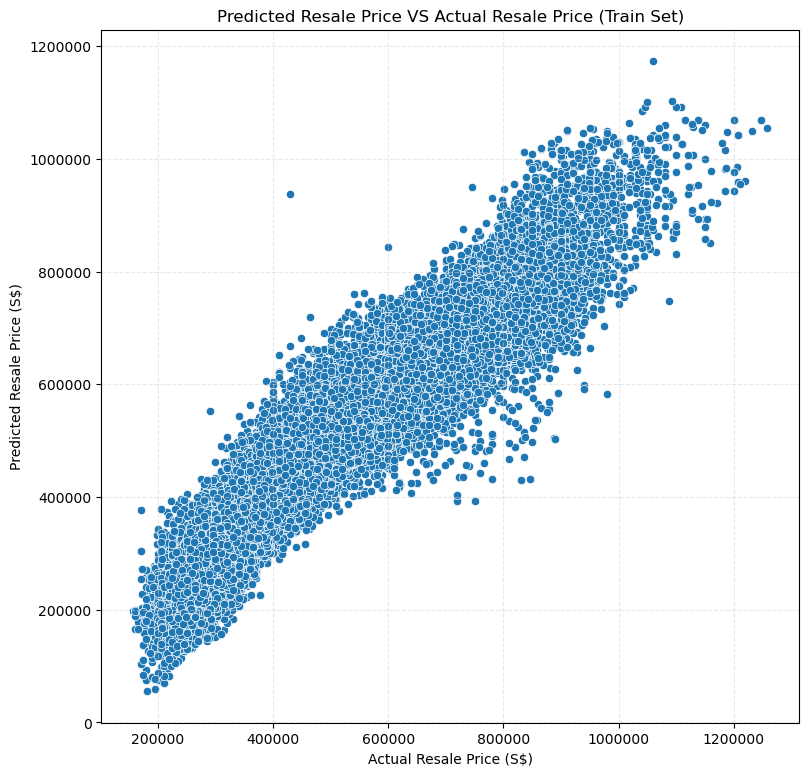

In [38]:
plt.figure(figsize=(9, 9))

sns.scatterplot(data=y_train_predicts_df, x='y_true', y='y_predict')
plt.title('Predicted Resale Price VS Actual Resale Price (Train Set)')
plt.ylabel('Predicted Resale Price (S$)')
plt.xlabel('Actual Resale Price (S$)')
plt.ticklabel_format(style='plain')
plt.grid(True, linestyle='dashed', color='lightgray', alpha=0.5)


In [39]:
# find the rmse

import math

train_mse = sum(y_train_predicts_df['difference']**2) / len(y_test)
train_rmse = math.sqrt(train_mse)

In [40]:
# train scores

print(f"R-squared score for fitted model: {ridge_model.score(X_train_tf, y_train)}")
print(f"RMSE score for fitted model: {train_rmse}")

R-squared score for fitted model: 0.8934831892529844
RMSE score for fitted model: 80965.60117312826


### Test set

In [41]:
# r2 score

ridge_model.score(X_test_tf, y_test)

0.8923529118928724

In [42]:
# use the fitted regression to predict the resale price

y_test_predict = ridge_model.predict(X_test_tf)

In [43]:
# put the values together in a dataframe for easier comparison and visualisation

y_test_predicts_df = pd.DataFrame({'y_true' : y_test, 'y_predict' : y_test_predict})
y_test_predicts_df['difference'] = y_test_predicts_df['y_true'] - y_test_predicts_df['y_predict']

In [44]:
pd.options.display.float_format = '{:,.2f}'.format

y_test_predicts_df.head()

,y_true,y_predict,difference
43208,"425,000.00","405,413.22","19,586.78"
121983,"274,000.00","168,338.89","105,661.11"
26270,"500,000.00","621,853.69","-121,853.69"
130748,"388,000.00","456,071.40","-68,071.40"
48896,"377,000.00","366,286.49","10,713.51"


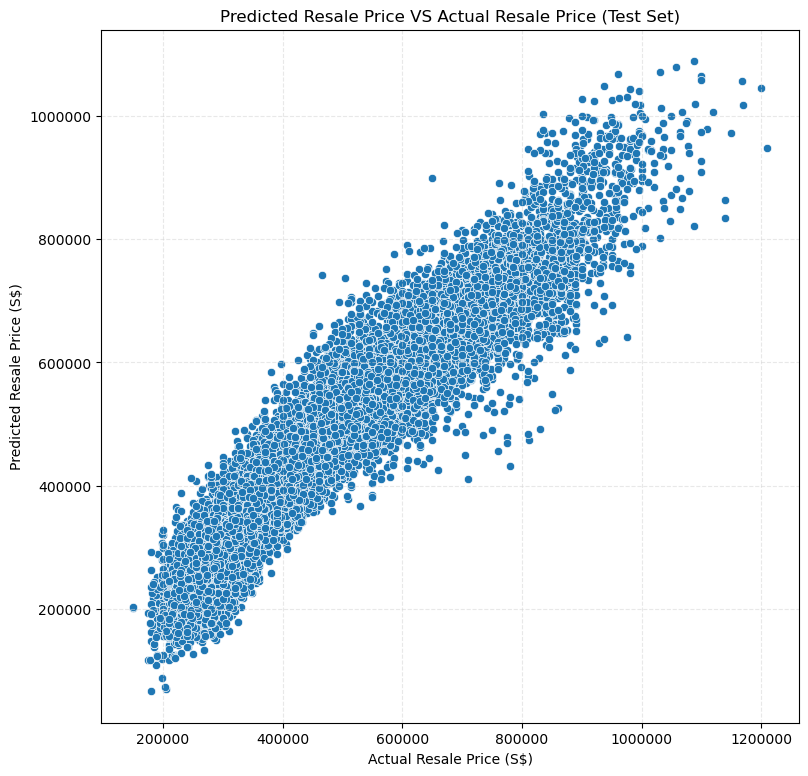

In [45]:
plt.figure(figsize=(9, 9))

sns.scatterplot(data=y_test_predicts_df, x='y_true', y='y_predict')
plt.title('Predicted Resale Price VS Actual Resale Price (Test Set)')
plt.ylabel('Predicted Resale Price (S$)')
plt.xlabel('Actual Resale Price (S$)')
plt.ticklabel_format(style='plain')
plt.grid(True, linestyle='dashed', color='lightgray', alpha=0.5)


In [46]:
# find the rmse

test_mse = sum(y_test_predicts_df['difference']**2) / len(y_test)
test_rmse = math.sqrt(test_mse)

In [47]:
# test scores

print(f"R-squared score for fitted model: {ridge_model.score(X_test_tf, y_test)}")
print(f"RMSE score for fitted model: {test_rmse}")

R-squared score for fitted model: 0.8923529118928724
RMSE score for fitted model: 46988.25248962947


## Finding which features have the most impact on resale price

In [48]:
# find the coefficients

coefs = ridge_model.coef_

In [49]:
# match the coefs to the feature

feature_names = X_train_tf.columns
coefs_df = pd.DataFrame({'feature' : feature_names, 'coefficients': coefs})

In [50]:
# get absolute value of coefficients for easier comparison

coefs_df['abs_coefs'] = abs(coefs)

In [51]:
coefs_df.head()

,feature,coefficients,abs_coefs
0,town_ANG MO KIO,"15,693.83","15,693.83"
1,town_BEDOK,"-156,992.65","156,992.65"
2,town_BISHAN,"52,045.40","52,045.40"
3,town_BUKIT BATOK,"-92,754.91","92,754.91"
4,town_BUKIT MERAH,"46,802.61","46,802.61"


In [52]:
# sort by abs_coefs to get most impact feature

coefs_sorted = coefs_df.sort_values(by="abs_coefs", ascending=False)
coefs_sorted

,feature,coefficients,abs_coefs
54,planning_area_Pasir Ris,"-244,132.36","244,132.36"
42,planning_area_Bedok,"197,519.63","197,519.63"
13,town_PASIR RIS,"185,441.34","185,441.34"
1,town_BEDOK,"-156,992.65","156,992.65"
23,town_infrequent_sklearn,"123,166.40","123,166.40"
...,...,...,...
189,pri_sch_affiliation,-220.29,220.29
173,multigen_sold,-218.96,218.96
59,planning_area_Serangoon,-174.93,174.93
174,studio_apartment_sold,103.48,103.48


In [53]:
# find the top 10 features

coefs_sorted[:10]

,feature,coefficients,abs_coefs
54,planning_area_Pasir Ris,"-244,132.36","244,132.36"
42,planning_area_Bedok,"197,519.63","197,519.63"
13,town_PASIR RIS,"185,441.34","185,441.34"
1,town_BEDOK,"-156,992.65","156,992.65"
23,town_infrequent_sklearn,"123,166.40","123,166.40"
3,town_BUKIT BATOK,"-92,754.91","92,754.91"
160,floor_area_sqft,"84,326.50","84,326.50"
31,flat_model_DBSS,"79,822.70","79,822.70"
40,flat_model_infrequent_sklearn,"79,466.91","79,466.91"
15,town_QUEENSTOWN,"76,932.60","76,932.60"


In [54]:
coefs_sorted['feature'][:10].values

array(['planning_area_Pasir Ris', 'planning_area_Bedok', 'town_PASIR RIS',
       'town_BEDOK', 'town_infrequent_sklearn', 'town_BUKIT BATOK',
       'floor_area_sqft', 'flat_model_DBSS',
       'flat_model_infrequent_sklearn', 'town_QUEENSTOWN'], dtype=object)

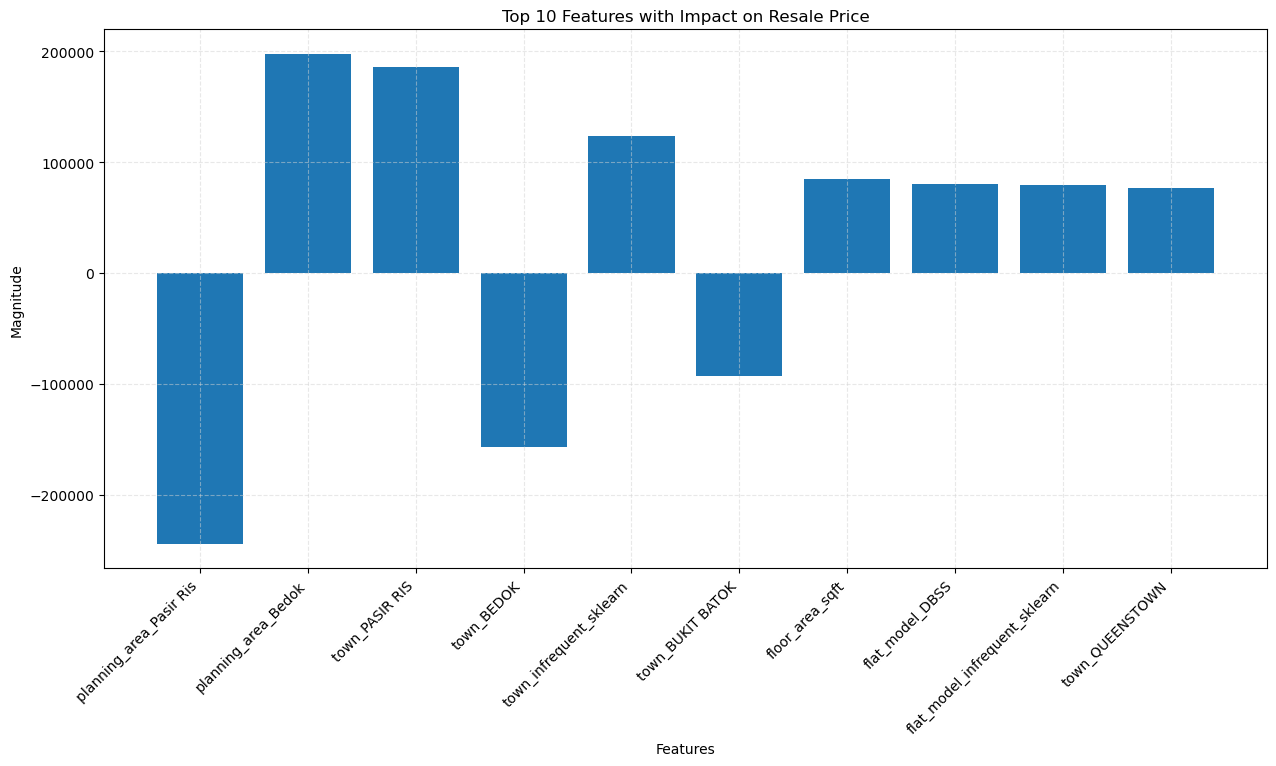

In [55]:
plt.figure(figsize=(15, 7))
 
plt.bar(data=coefs_sorted[:10], x='feature', height='coefficients', width = 0.8)
 
plt.xlabel("Features")
plt.ylabel("Magnitude")
plt.title("Top 10 Features with Impact on Resale Price")
tick_positions = plt.xticks()[0]
tick_labels = coefs_sorted['feature'][:10].values
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')

plt.grid(True, linestyle='dashed', color='lightgray', alpha=0.5)

## Conducting an Independent Test

### Load the test.csv set 

In [56]:
hdb_test = pd.read_pickle("data/hdb_test_clean.pkl")
hdb_test_og = pd.read_pickle("data/hdb_test_original.pkl")

### Model prepping

In [57]:
test_features = hdb_test.drop(columns = ['resale_price', 'lease_commence_date'])
X_testcsv = test_features
y_testcsv = hdb_test['resale_price']

In [58]:
categorical = X_testcsv.select_dtypes(include='object')

In [59]:
cat_encoded = pd.DataFrame(encoder.transform(categorical).toarray(), columns = encoder.get_feature_names_out(categorical.columns), index = categorical.index)

In [60]:
numerical = X_testcsv.select_dtypes(include=np.number)

In [61]:
num_scaled = pd.DataFrame(scaler.transform(numerical), columns=scaler.get_feature_names_out(numerical.columns), index=numerical.index)

In [62]:
X_transformed = pd.merge(cat_encoded, num_scaled, left_index =True, right_index=True)

In [63]:
X_transformed.shape

(16737, 194)

### Getting predictions

In [64]:
testcsv_predictions = ridge_model.predict(X_transformed)

In [65]:
testcsv_predictions

array([362282.84471011, 498249.70231224, 357324.2798545 , ...,
       390208.6041012 , 475529.48944732, 377162.00114504])

In [66]:
hdb_test_og = pd.read_pickle("data/hdb_test_original.pkl")

In [67]:
# csv for kaggle

data = {'id': hdb_test_og['id'],
        'Predicted': testcsv_predictions}

for_kaggle = pd.DataFrame(data)

In [68]:
for_kaggle.head()

,id,Predicted
0,114982,"362,282.84"
1,95653,"498,249.70"
2,40303,"357,324.28"
3,109506,"305,768.01"
4,100149,"441,721.98"


In [69]:
for_kaggle.to_csv('./data/hdb_predictions_kaggle.csv', index=False)